## Introduction
Mental health in the workplace is an increasingly important topic as organizations strive to create environments that promote well-being and productivity. The dataset analyzed in this project is derived from the OSMI Mental Health in Tech Survey, an open dataset that examines mental health issues within the tech industry and beyond. The survey collects information on workplace mental health conditions, employee perceptions, and company practices to support mental well-being.

Dataset Details:

Source: [OSMI Mental Health in Tech Survey](https://osmhhelp.org/research.html)

Description: The dataset contains responses from employees across various industries and regions, focusing on demographics, workplace conditions, and mental health interference levels.

Purpose: To identify patterns and trends that can inform organizational strategies to improve mental health support systems.

# Key Objectives:

1. Investigate the role of company size, age, and other demographics in mental health interference.
2. Identify trends that may guide organizations in implementing better support systems.
3. Provide actionable insights and recommendations for fostering a healthier workplace environment.
4. This analysis aims to tell a story through data by exploring the relationships between employee demographics, workplace environments, and mental health challenges, ultimately helping organizations take informed action.

In [1]:
pip install pandas numpy matplotlib seaborn plotly scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

file_path = "D:\Projects\Mental_Health_EDA\Data\Survey_Responses.csv"
data = pd.read_csv(file_path)

In [3]:
print("Dataset Preview:")
display(data.head())

Dataset Preview:


,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 27 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Timestamp                                                                                                             1260 non-null   object
 1   Age                                                                                                                   1260 non-null   int64 
 2   Gender                                                                                                                1260 non-null   object
 3   Country                                                                                                               1260 non-null   object
 4

In [5]:
print("\nSummary Statistics:")
display(data.describe(include="all"))


Summary Statistics:


,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
count,1260,1.260000e+03,1260,1260,744,1242,1260,1260,996,1260,...,1260,1260,1260,1260,1260,1260,1260,1260,1260,164
unique,1249,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,8/28/2014 9:59:39,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,616,751,138,1096,768,637,466,290,...,564,490,926,775,516,1009,558,576,1075,5
mean,NaN,7.936511e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.817181e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Pre-processing

### Handling missing values

In [6]:
print(data["If you live in the United States, which state or territory do you live in?"].value_counts(dropna=False))

NaN    516
CA     138
WA      70
NY      57
TN      45
TX      44
OH      30
IL      29
OR      29
PA      29
IN      27
MI      22
MN      21
MA      20
FL      15
NC      14
VA      14
WI      12
GA      12
MO      12
UT      11
CO       9
MD       8
AL       8
AZ       7
OK       6
NJ       6
KY       5
SC       5
IA       4
CT       4
DC       4
NV       3
VT       3
SD       3
KS       3
NH       3
WY       2
NM       2
NE       2
WV       1
ID       1
MS       1
RI       1
LA       1
ME       1
Name: If you live in the United States, which state or territory do you live in?, dtype: int64


In [7]:
missing_states = data[data["If you live in the United States, which state or territory do you live in?"].isnull()]

us_missing_states_count = missing_states[missing_states["Country"] == "United States"].shape[0]
print(f"\nNumber of missing states where 'Country' is 'United States': {us_missing_states_count}")

non_us_missing_states_count = missing_states[missing_states["Country"] != "United States"].shape[0]
print(f"Number of missing states where 'Country' is NOT 'United States': {non_us_missing_states_count}")


Number of missing states where 'Country' is 'United States': 11
Number of missing states where 'Country' is NOT 'United States': 505


#### Observation-
There are 516 NaN values here. But, it seems like most of the missing fields for this column are Non-US residents. So, instead of dropping the column, we can mark those empty rows as Non-U.S. resident

In [8]:
data.loc[
    (data["Country"] == "United States") & 
    (data["If you live in the United States, which state or territory do you live in?"].isnull()),
    "If you live in the United States, which state or territory do you live in?"
] = None  

data.loc[
    (data["Country"] != "United States") & 
    (data["If you live in the United States, which state or territory do you live in?"].isnull()),
    "If you live in the United States, which state or territory do you live in?"
] = "Non-U.S. resident"  

In [9]:
print("\nUpdated unique values and counts in 'If you live in the United States, which state or territory do you live in?':")
print(data["If you live in the United States, which state or territory do you live in?"].value_counts(dropna=False))

us_null_check = data[
    (data["Country"] == "United States") & 
    (data["If you live in the United States, which state or territory do you live in?"].isnull())
]
print(f"\nRemaining NULL values for U.S. rows: {us_null_check.shape[0]}")


Updated unique values and counts in 'If you live in the United States, which state or territory do you live in?':
Non-U.S. resident    505
CA                   138
WA                    70
NY                    57
TN                    45
TX                    44
OH                    30
IL                    29
PA                    29
OR                    29
IN                    27
MI                    22
MN                    21
MA                    20
FL                    15
NC                    14
VA                    14
GA                    12
MO                    12
WI                    12
UT                    11
None                  11
CO                     9
MD                     8
AL                     8
AZ                     7
NJ                     6
OK                     6
SC                     5
KY                     5
IA                     4
DC                     4
CT                     4
NV                     3
NH                     3
KS        

In [10]:
print(data["Gender"].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


#### Observation-
It seems essential to normalize the Gender column considering the variety of responses present

In [11]:
gender_map = {
    "M": "Male", "m": "Male", "male": "Male", "Male": "Male", "Male-ish": "Male",
    "maile": "Male", "Mal": "Male", "Make": "Male", "msle": "Male", "Malr": "Male", "Mail": "Male",
    "Man": "Male", "cis male": "Male", "Cis Male": "Male", "Male (CIS)": "Male",

    "F": "Female", "f": "Female", "female": "Female", "Female": "Female", "Femake": "Female",
    "Woman": "Female", "woman": "Female", "Cis Female": "Female", "cis-female/femme": "Female",
    "Female (cis)": "Female", "Female (trans)": "Female", "femail": "Female",

    "Trans-female": "Other", "Trans woman": "Other", "non-binary": "Other", "Genderqueer": "Other",
    "fluid": "Other", "Androgyne": "Other", "Agender": "Other", "queer": "Other",
    "queer/she/they": "Other", "male leaning androgynous": "Other", "Enby": "Other",
    "A little about you": "Other", "ostensibly male, unsure what that really means": "Other",
    "something kinda male?": "Other", "Guy (-ish) ^_^": "Other", "Neuter": "Other",
    "All": "Other", "p": "Other", 
}

data["Gender"] = data["Gender"].apply(lambda x: gender_map.get(x.strip(), "Other"))

In [12]:
print("\nUnique values in 'Gender' after normalization:")
print(data["Gender"].unique())


Unique values in 'Gender' after normalization:
['Female' 'Male' 'Other']


In [13]:
print(data["Age"].describe())

count    1.260000e+03
mean     7.936511e+07
std      2.817181e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


#### Observation-
Mean and Std Deviation are extremely high and minimum value is negative which tells that there are outliers in this column.We can replace these outliers with the Median of Age column

In [14]:
data.loc[(data["Age"] < 18) | (data["Age"] > 120), "Age"] = None
data["Age"].fillna(data["Age"].median(), inplace=True)

In [15]:
print(data["Age"].describe())

count    1260.000000
mean       32.076984
std         7.267035
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


In [16]:
data["Are you self-employed?"].fillna("Unknown", inplace=True)

In [17]:
data["If you have a mental health condition, do you feel that it interferes with your work?"].fillna("Unknown", inplace=True)

In [18]:
data["How many employees does your company or organization have?"] = data["How many employees does your company or organization have?"].str.replace("-", " to ")

In [19]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Year"] = data["Timestamp"].dt.year
data["Month"] = data["Timestamp"].dt.month

In [20]:
display(data.head())

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments,Year,Month
0,2014-08-27 11:29:31,37.0,Female,United States,IL,Unknown,No,Yes,Often,6 to 25,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,2014,8
1,2014-08-27 11:29:37,44.0,Male,United States,IN,Unknown,No,No,Rarely,More than 1000,...,No,No,No,No,No,Don't know,No,NaN,2014,8
2,2014-08-27 11:29:44,32.0,Male,Canada,Non-U.S. resident,Unknown,No,No,Rarely,6 to 25,...,No,Yes,Yes,Yes,Yes,No,No,NaN,2014,8
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,Non-U.S. resident,Unknown,Yes,Yes,Often,26 to 100,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,2014,8
4,2014-08-27 11:30:22,31.0,Male,United States,TX,Unknown,No,No,Never,100 to 500,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,2014,8


In [21]:
display(data.describe(include="all"))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12008\3021487127.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(data.describe(include="all"))


,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments,Year,Month
count,1260,1260.000000,1260,1260,1249,1260,1260,1260,1260,1260,...,1260,1260,1260,1260,1260,1260,1260,164,1260.000000,1260.000000
unique,1249,NaN,3,48,46,3,2,2,5,6,...,3,3,3,3,3,3,2,160,NaN,NaN
top,2014-08-28 09:59:39,NaN,Male,United States,Non-U.S. resident,No,No,Yes,Sometimes,6 to 25,...,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.,NaN,NaN
freq,2,NaN,991,751,505,1096,768,637,466,290,...,926,775,516,1009,558,576,1075,5,NaN,NaN
first,2014-08-27 11:29:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-06-22 00:39:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.076984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.057937,7.795238
std,NaN,7.267035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246936,1.259490
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,1.000000
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,8.000000


### Now the data looks much better and is ready for analysis.

In [22]:
output_path = "D:\Projects\Mental_Health_EDA\Data\cleaned_mental_health_dataset.csv"

data.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: D:\Projects\Mental_Health_EDA\Data\cleaned_mental_health_dataset.csv


## Exploratory Data Analysis
### Step 1: Demographic Analysis

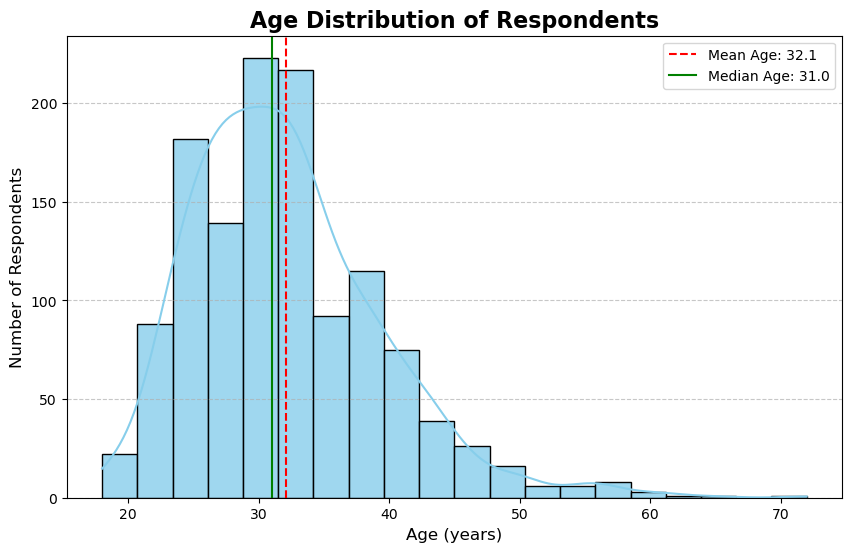

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue', alpha=0.8)
plt.title('Age Distribution of Respondents', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.axvline(data['Age'].mean(), color='red', linestyle='--', label=f'Mean Age: {data["Age"].mean():.1f}')
plt.axvline(data['Age'].median(), color='green', linestyle='-', label=f'Median Age: {data["Age"].median()}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Plot Explanation:
This plot showcases the age distribution of respondents, highlighting the predominant age group participating in the survey. Age is a key demographic factor in mental health studies.
#### Observations:
The majority of respondents fall within the 25–35 age group.
#### Why This Matters:
This age group often represents early to mid-career professionals, where workplace mental health issues may emerge due to work pressure, career growth challenges, and work-life balance.

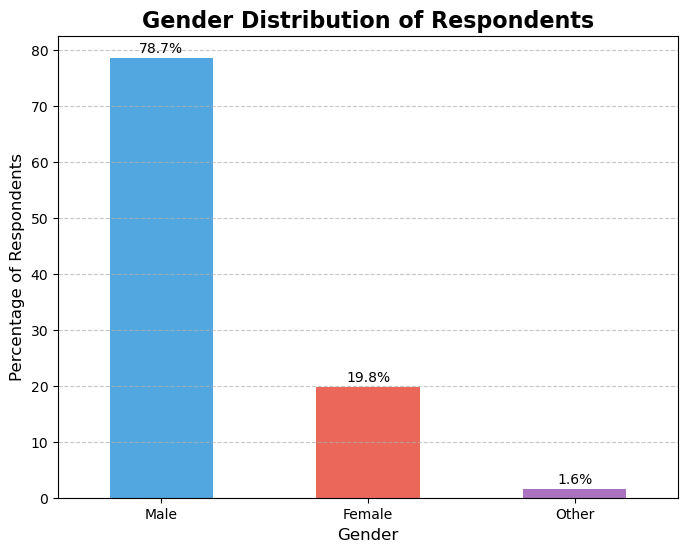

In [24]:
gender_counts = data['Gender'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
colors = ['#3498db', '#e74c3c', '#9b59b6']
gender_counts.plot(kind='bar', color=colors, alpha=0.85)
plt.title('Gender Distribution of Respondents', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(gender_counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10, color='black')
plt.show()

#### Plot Explanation:
Gender-based analysis identifies which gender groups are more represented in the survey and can later help correlate gender with mental health awareness or treatment-seeking behavior.
#### Observations:
The survey is heavily skewed towards male respondents.
#### Why This Matters:
Understanding the gender balance is crucial to identifying potential gender biases in mental health discussions or policies.

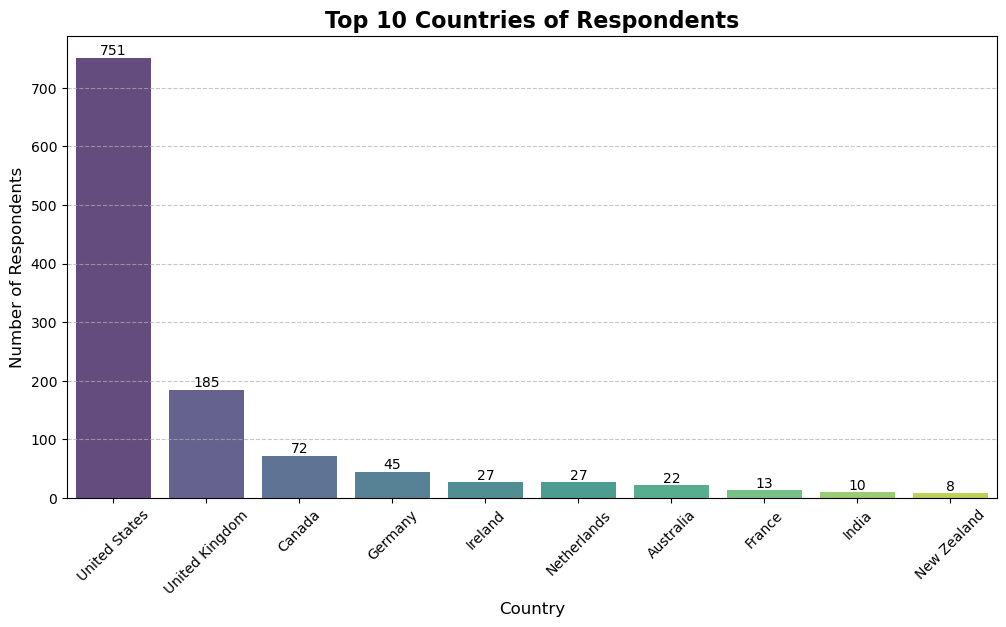

In [25]:
top_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', alpha=0.85)
plt.title('Top 10 Countries of Respondents', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(top_countries.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.show()

#### Plot Explanation:
This plot highlights the top 10 countries of respondents, providing insight into the geographical diversity of the data.
#### Observations:
The United States has the highest number of respondents, followed by other countries with significantly fewer participants.
#### Why This Matters:
This geographical skew should be considered when interpreting insights, as cultural and workplace mental health norms differ by country.

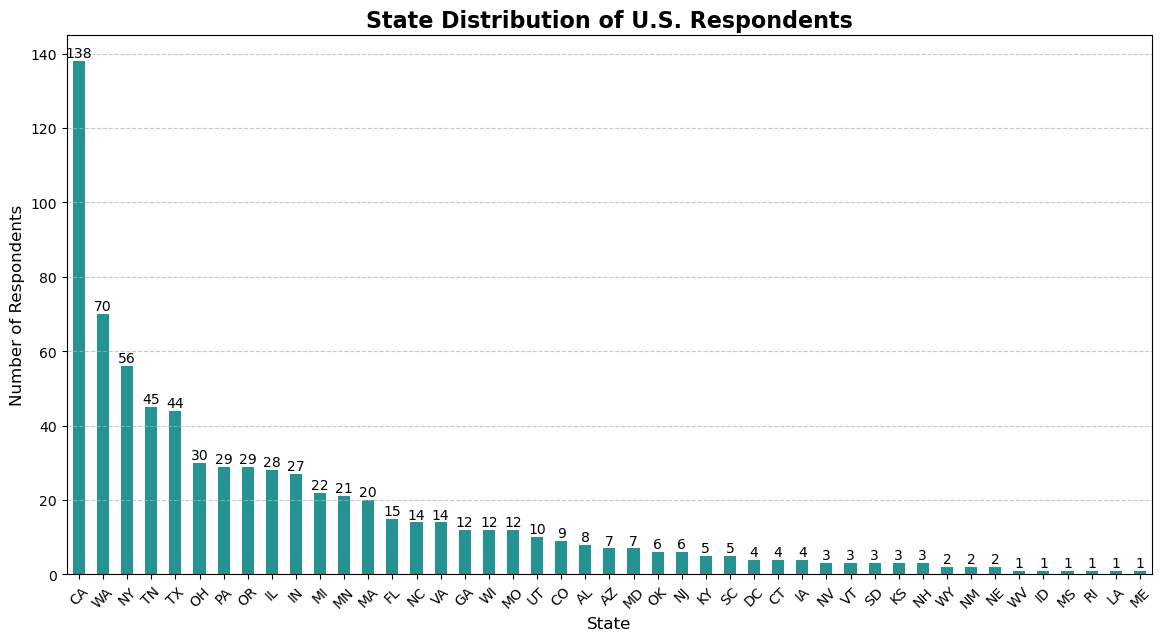

In [26]:
us_states = data[data['Country'] == 'United States']['If you live in the United States, which state or territory do you live in?']
state_counts = us_states.value_counts()

plt.figure(figsize=(14, 7))
state_counts.plot(kind='bar', color='teal', alpha=0.85)
plt.title('State Distribution of U.S. Respondents', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(state_counts):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.show()

#### Plot Explanation:
For respondents within the U.S., this plot shows their state-level distribution, providing a more granular geographical breakdown.
#### Observations:
States such as California, Texas, and New York have the highest representation, likely reflecting population size and tech industry hubs.
#### Why This Matters:
State-specific analysis can help identify regional trends or gaps in mental health awareness and support in the workplace.

### Step 2: Exploring Mental Health Awareness and Support in the Workplace 

#### Question 1-
Do employers provide mental health benefits to their employees?

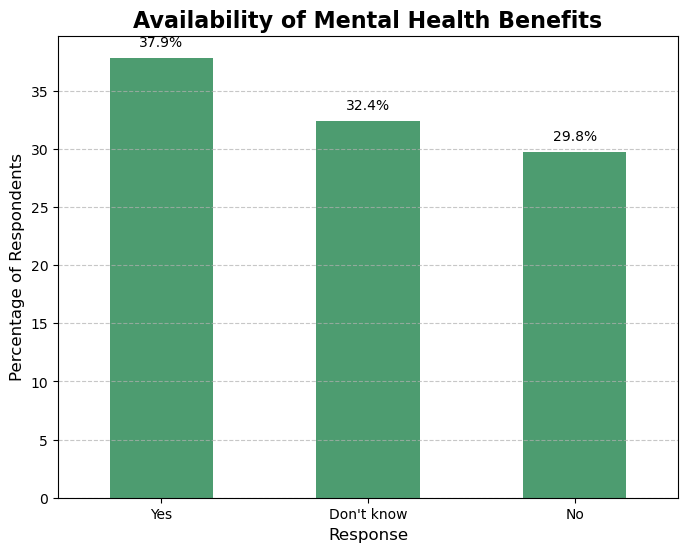

In [27]:
plt.figure(figsize=(8, 6))
benefits_counts = data['Does your employer provide mental health benefits?'].value_counts(normalize=True) * 100
benefits_counts.sort_values(ascending=False).plot(kind='bar', color='seagreen', alpha=0.85)
plt.title('Availability of Mental Health Benefits', fontsize=16, fontweight='bold')
plt.xlabel('Response', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(benefits_counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10, color='black')
plt.xticks(rotation=0)
plt.show()

#### Observations:
A significant percentage of respondents indicate that mental health benefits are either not provided by their employer or they don't know about it.
#### Why This Matters:
The lack of benefits suggests room for improvement in organizational policies to support mental health.

#### Question 2-
Do employers discuss mental health as part of their wellness programs?

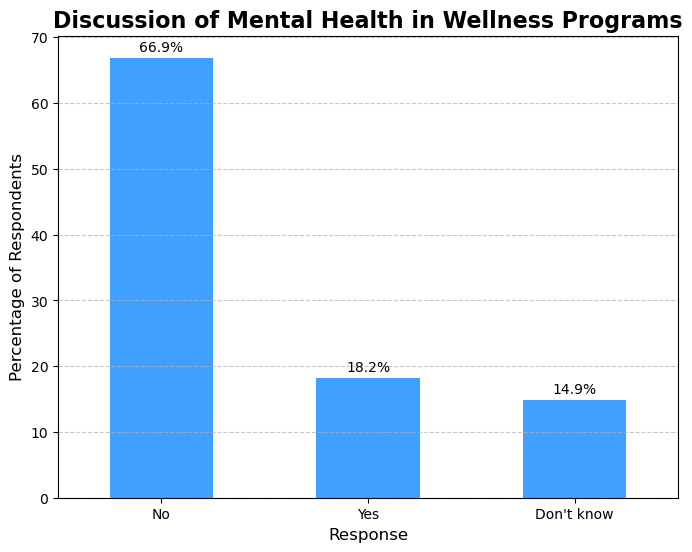

In [28]:
plt.figure(figsize=(8, 6))
discussion_counts = data['Has your employer ever discussed mental health as part of an employee wellness program?'].value_counts(normalize=True) * 100
discussion_counts.sort_values(ascending=False).plot(kind='bar', color='dodgerblue', alpha=0.85)
plt.title('Discussion of Mental Health in Wellness Programs', fontsize=16, fontweight='bold')
plt.xlabel('Response', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(discussion_counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10, color='black')
plt.xticks(rotation=0)
plt.show()

#### Observations:
Maximum number of employers have not incorporated mental health discussions into wellness programs.
#### Why This Matters:
Initiating such discussions is a crucial step towards reducing stigma and increasing awareness.

#### Question 3-
Do employees fear negative consequences for discussing mental health issues with their employer?

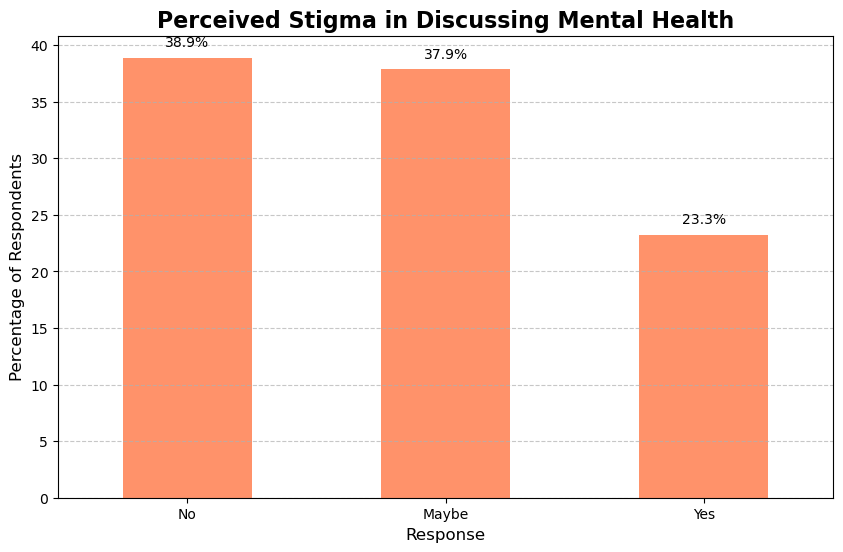

In [29]:
plt.figure(figsize=(10, 6))
stigma_counts = data['Do you think that discussing a mental health issue with your employer would have negative consequences?'].value_counts(normalize=True) * 100
stigma_counts.sort_values(ascending=False).plot(kind='bar', color='coral', alpha=0.85)
plt.title('Perceived Stigma in Discussing Mental Health', fontsize=16, fontweight='bold')
plt.xlabel('Response', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(stigma_counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10, color='black')
plt.xticks(rotation=0)
plt.show()

#### Observations:
A considerable percentage of respondents believe discussing mental health issues with employers could lead to negative consequences.
#### Why This Matters:
Workplace cultures that perpetuate such stigma need targeted interventions to create a more supportive environment.

#### Question 4-
Are employees comfortable discussing mental health issues with their coworkers?

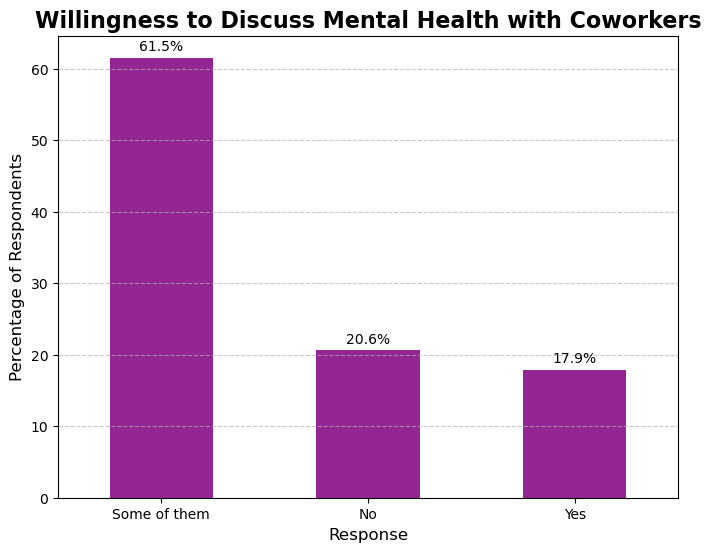

In [30]:
plt.figure(figsize=(8, 6))
coworker_counts = data['Would you be willing to discuss a mental health issue with your coworkers?'].value_counts(normalize=True) * 100
coworker_counts.sort_values(ascending=False).plot(kind='bar', color='purple', alpha=0.85)
plt.title('Willingness to Discuss Mental Health with Coworkers', fontsize=16, fontweight='bold')
plt.xlabel('Response', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(coworker_counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10, color='black')
plt.xticks(rotation=0)
plt.show()

#### Observations:
A majority discuss mental health with some of their coworkers assuming that they have developed close friendship with them. But they are hesitant to discuss mental health with everyone.
#### Why This Matters:
This suggests that workplace culture may discourage open dialogue about mental health, perpetuating stigma.

#### Question 5-
How easy is it for employees to take leave for mental health conditions?

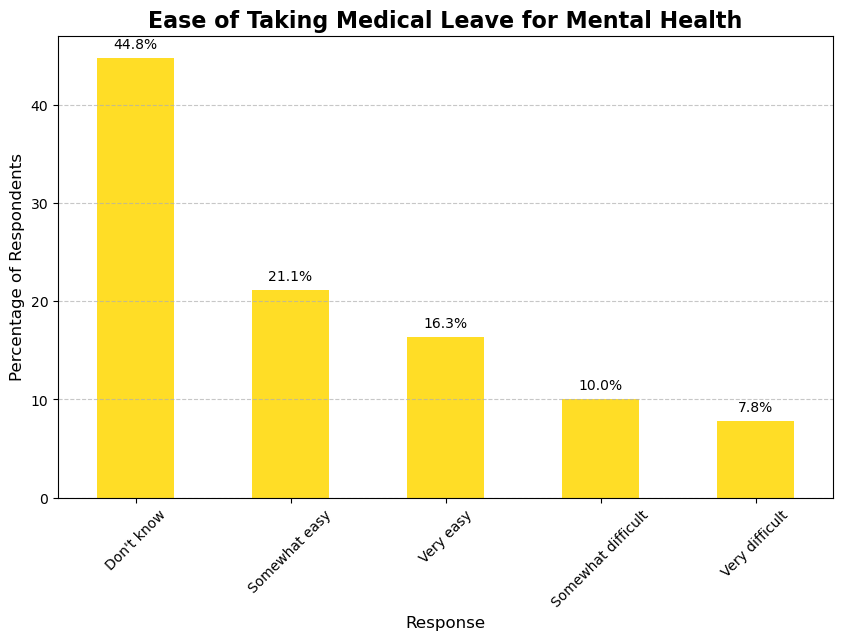

In [31]:
plt.figure(figsize=(10, 6))
leave_counts = data['How easy is it for you to take medical leave for a mental health condition?'].value_counts(normalize=True) * 100
leave_counts.sort_values(ascending=False).plot(kind='bar', color='gold', alpha=0.85)
plt.title('Ease of Taking Medical Leave for Mental Health', fontsize=16, fontweight='bold')
plt.xlabel('Response', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(leave_counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.show()

#### Observations:
Some employees find it difficult to take leave for mental health conditions.
#### Why This Matters:
Policies that make mental health leave as accessible as physical health leave can significantly improve employee well-being.

### Step 3- Correlation Analysis and Multivariate Exploration 

#### Question 1-
Does age influence how mental health conditions interfere with work?

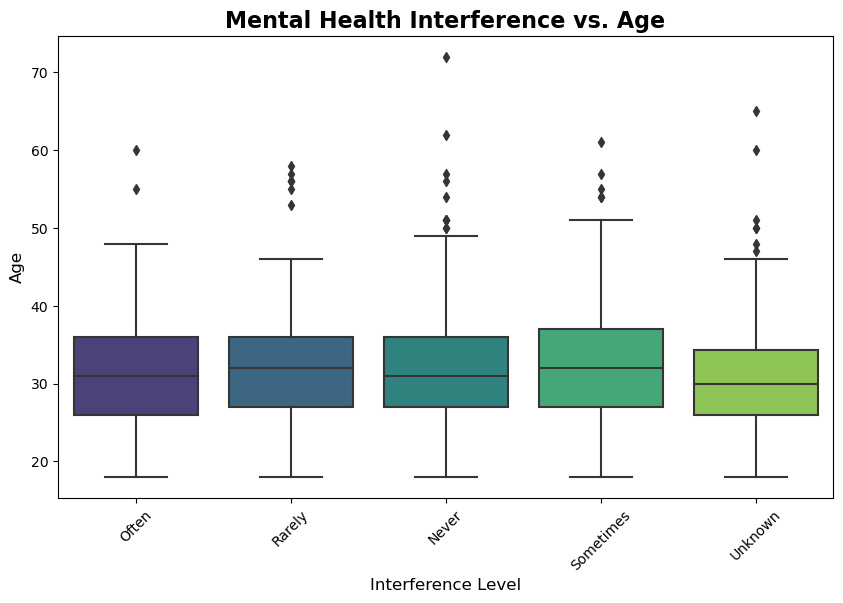

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='If you have a mental health condition, do you feel that it interferes with your work?', y='Age', palette="viridis")
plt.title("Mental Health Interference vs. Age", fontsize=16, fontweight='bold')
plt.xlabel("Interference Level", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Observations-
1. The median age is fairly consistent across categories (around 30-35 years old), which suggests that age alone may not significantly influence interference levels. Other factors, such as workplace support or cultural attitudes, might play a bigger role.
2. There are several outliers in each category, indicating that some respondents are either unusually young or old compared to the majority.

#### Question 2-
Do larger companies provide better mental health benefits?

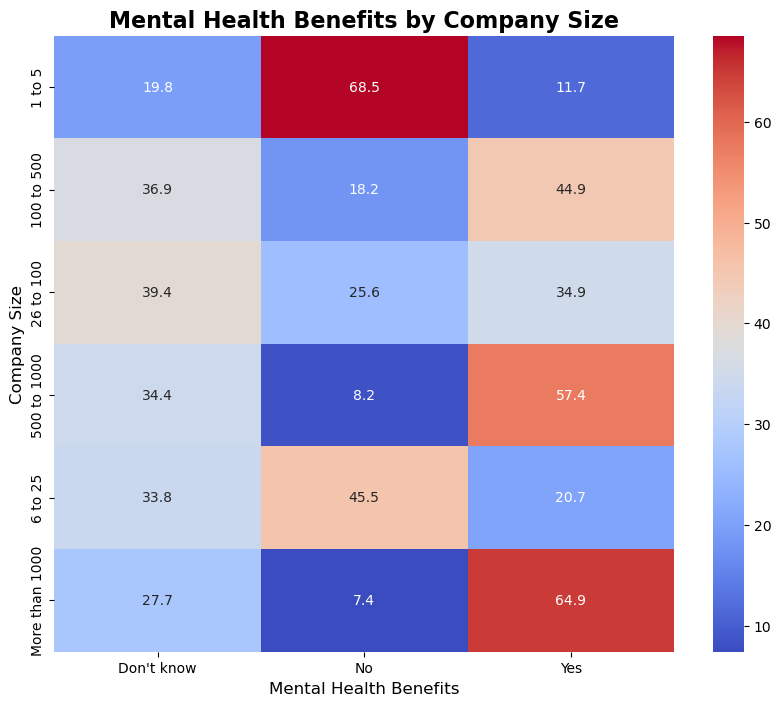

In [33]:
company_benefits = pd.crosstab(data['How many employees does your company or organization have?'], 
                               data['Does your employer provide mental health benefits?'], 
                               normalize='index') * 100

plt.figure(figsize=(10, 8))
sns.heatmap(company_benefits, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Mental Health Benefits by Company Size", fontsize=16, fontweight='bold')
plt.xlabel("Mental Health Benefits", fontsize=12)
plt.ylabel("Company Size", fontsize=12)
plt.show()

#### Observations
Larger companies provide more health benefits as compared to the smaller ones as they often have more resources to offer benefits. Smaller organizations may struggle to provide adequate support.

#### Question 3-
Are there gender-based differences in the willingness to discuss mental health with coworkers?

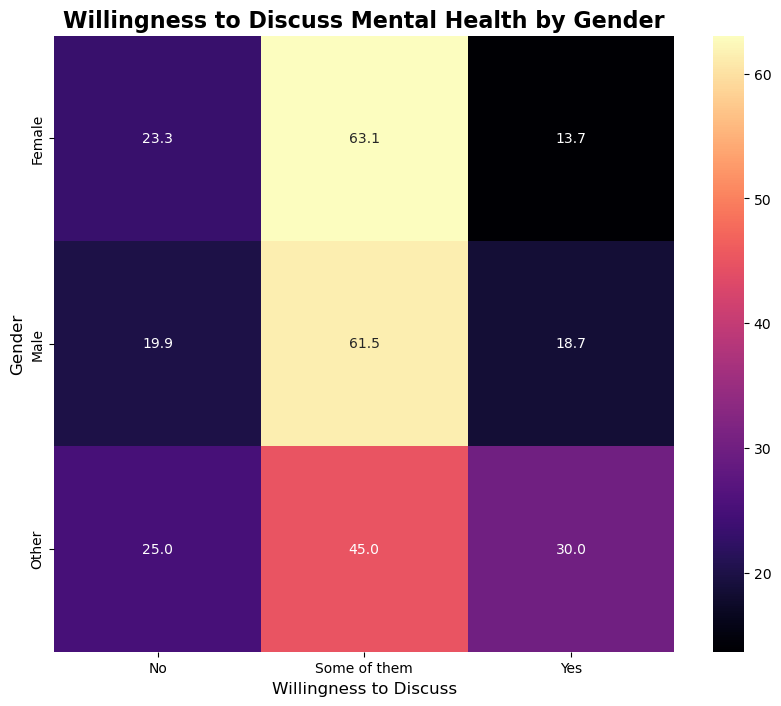

In [34]:
gender_discussion = pd.crosstab(data['Gender'], 
                                data['Would you be willing to discuss a mental health issue with your coworkers?'], 
                                normalize='index') * 100

plt.figure(figsize=(10, 8))
sns.heatmap(gender_discussion, annot=True, fmt=".1f", cmap="magma", cbar=True)
plt.title("Willingness to Discuss Mental Health by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Willingness to Discuss", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.show()

### Observations-
Willingess to discuss a mental health issue with coworkers is not related to gender as most discuss the issues with only some of their coworkers.

#### Question 4-
How does employer support (e.g., benefits, discussions) correlate with perceived stigma?

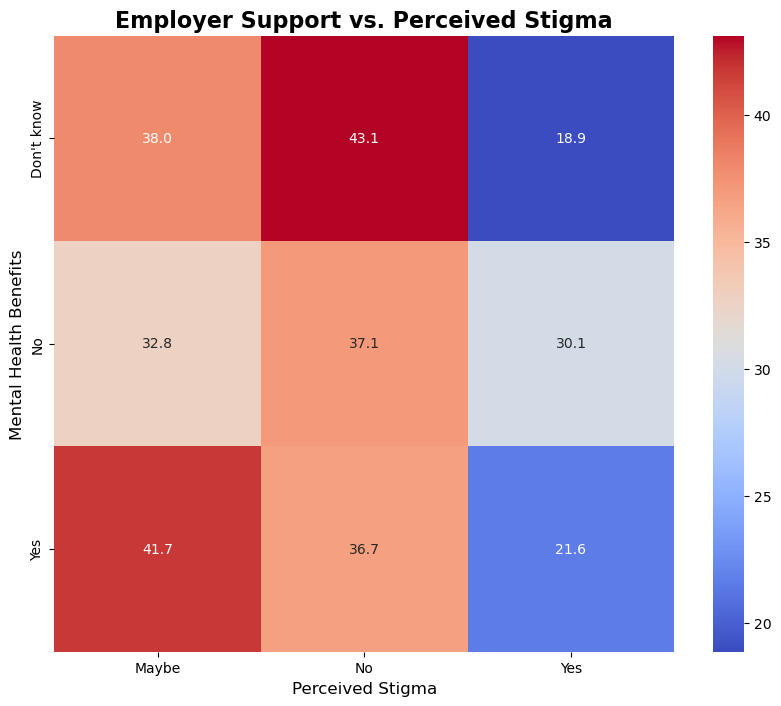

In [35]:
support_stigma = pd.crosstab(data['Does your employer provide mental health benefits?'], 
                             data['Do you think that discussing a mental health issue with your employer would have negative consequences?'], 
                             normalize='index') * 100

plt.figure(figsize=(10, 8))
sns.heatmap(support_stigma, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Employer Support vs. Perceived Stigma", fontsize=16, fontweight='bold')
plt.xlabel("Perceived Stigma", fontsize=12)
plt.ylabel("Mental Health Benefits", fontsize=12)
plt.show()

### Conclusion
This analysis highlights the importance of addressing mental health in the workplace, with specific attention to smaller companies and younger workers who seem to be disproportionately affected. Companies must adopt inclusive policies, provide accessible resources, and foster a culture where employees feel safe discussing mental health issues.

By acting on these insights, organizations can improve productivity, employee retention, and overall workplace satisfaction while contributing to a broader movement toward mental health awareness and support.